In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

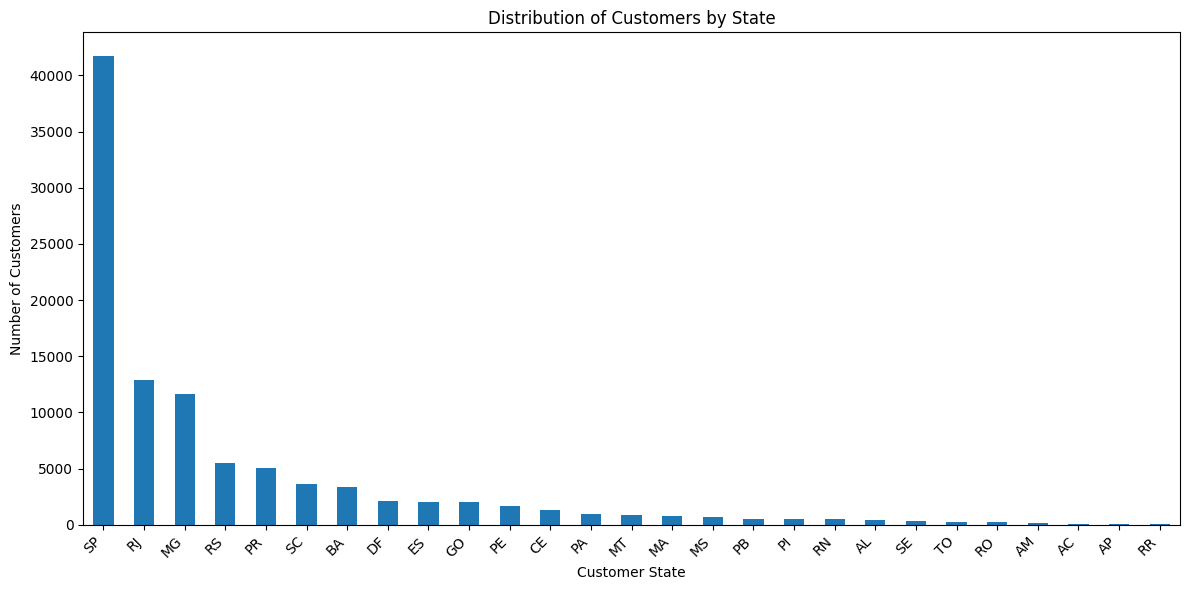

In [2]:
# Load the Customers dataset
customers_df = pd.read_csv('/kaggle/input/project-for-python/Customers.csv')

# Calculate the distribution of customers by state
state_distribution = customers_df['customer_state'].value_counts()

# Create a bar plot
plt.figure(figsize=(12, 6))
state_distribution.plot(kind='bar')
plt.title('Distribution of Customers by State')
plt.xlabel('Customer State')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

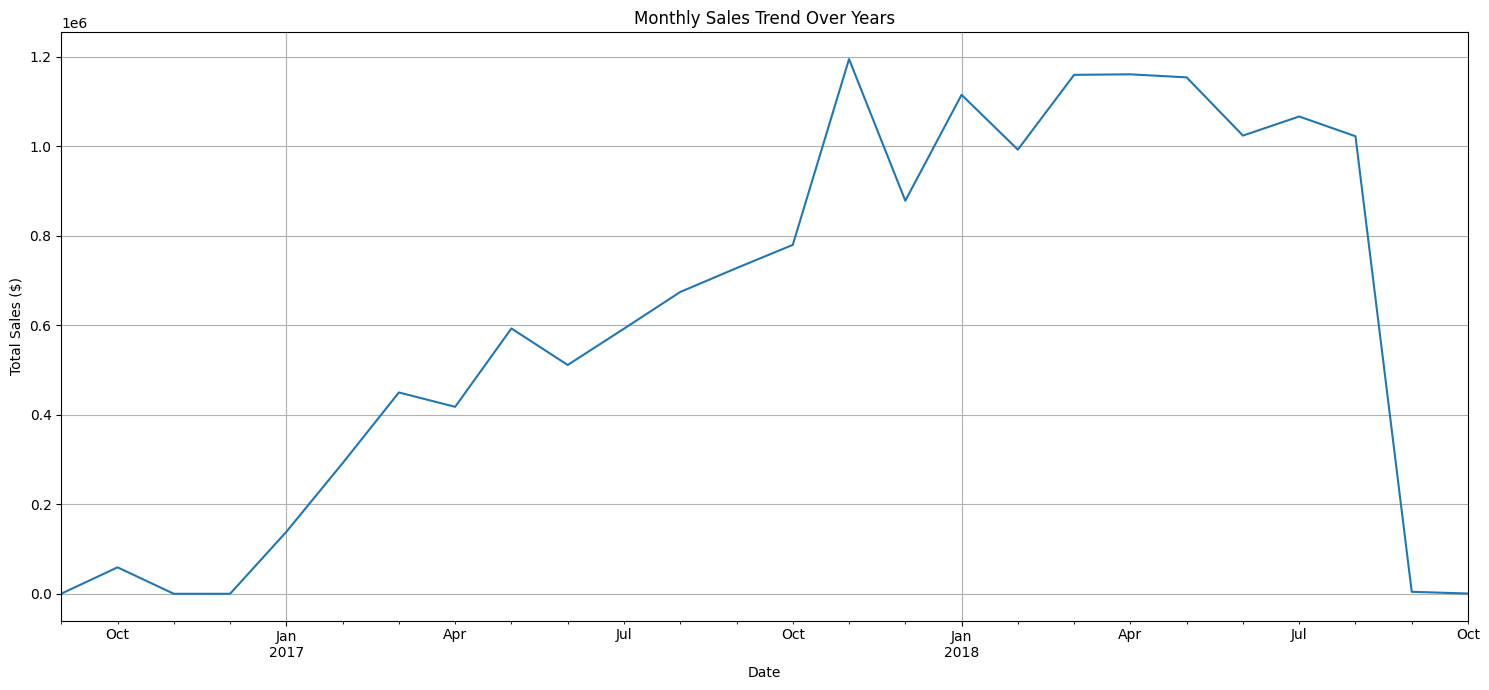

In [3]:


# Load the orders and payments datasets
orders_df = pd.read_csv('/kaggle/input/project-for-python/orders.csv')
payments_df = pd.read_csv('/kaggle/input/project-for-python/payments.csv')

# Merge the two DataFrames on 'order_id'
sales_df = pd.merge(orders_df, payments_df, on='order_id')

# Convert 'order_purchase_timestamp' to datetime objects
sales_df['order_purchase_timestamp'] = pd.to_datetime(sales_df['order_purchase_timestamp'])

# Set 'order_purchase_timestamp' as the index for easier resampling
sales_df.set_index('order_purchase_timestamp', inplace=True)

# Resample by month and sum the 'payment_value' to get monthly sales
# Changed 'M' to 'ME' as suggested by the warning
monthly_sales = sales_df['payment_value'].resample('ME').sum()

# Create a line plot
plt.figure(figsize=(15, 7))
monthly_sales.plot(kind='line')
plt.title('Monthly Sales Trend Over Years')
plt.xlabel('Date')
plt.ylabel('Total Sales ($)')
plt.grid(True)
plt.tight_layout()
plt.show()

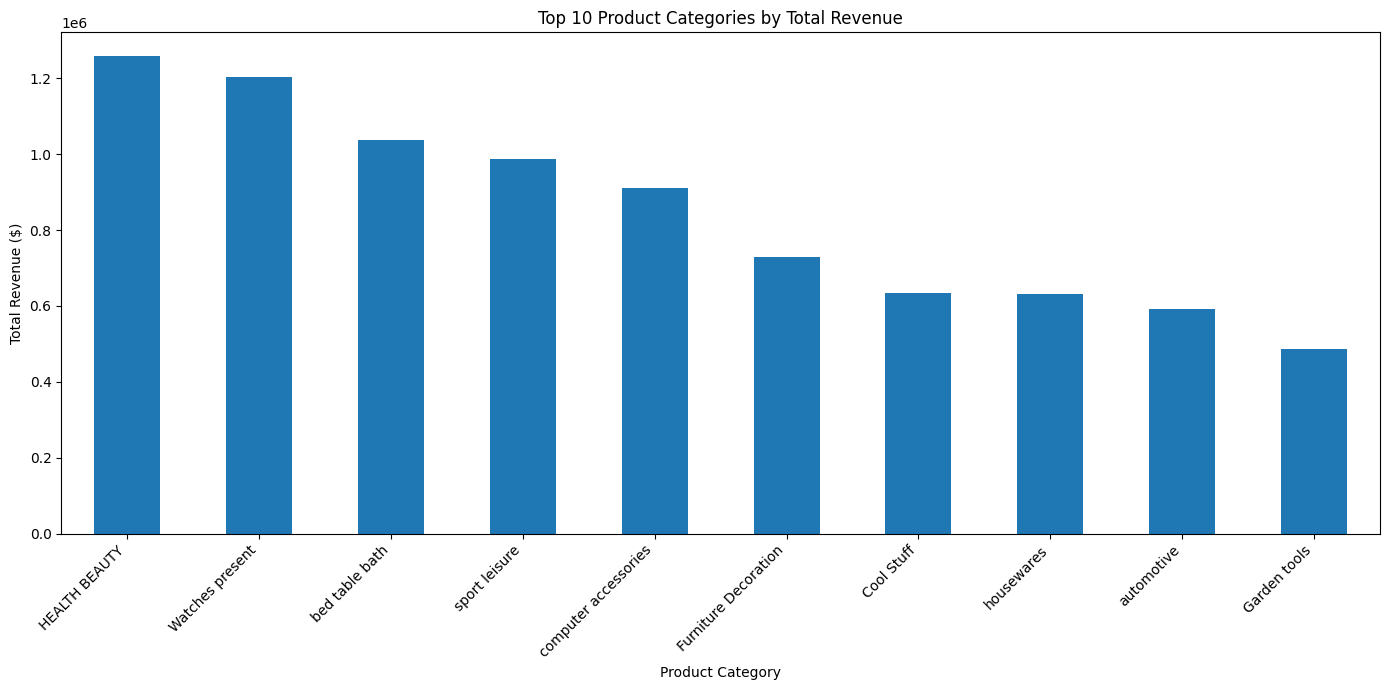

In [4]:

# Load the products and order_items datasets
products_df = pd.read_csv('/kaggle/input/project-for-python/products.csv')
order_items_df = pd.read_csv('/kaggle/input/project-for-python/order_items.csv')

# Merge the two DataFrames on 'product_id'
product_revenue_df = pd.merge(order_items_df, products_df, on='product_id')

# Calculate total revenue per product category
category_revenue = product_revenue_df.groupby('product category')['price'].sum().sort_values(ascending=False)

# Select the top 10 product categories
top_10_categories = category_revenue.head(10)

# Create a bar plot for the top 10 categories
plt.figure(figsize=(14, 7))
top_10_categories.plot(kind='bar')
plt.title('Top 10 Product Categories by Total Revenue')
plt.xlabel('Product Category')
plt.ylabel('Total Revenue ($)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

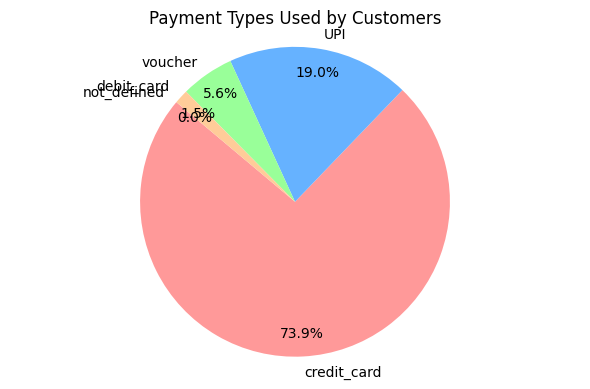

In [5]:


# Load the payments dataset
payments_df = pd.read_csv('/kaggle/input/project-for-python/payments.csv')

# Calculate the count of each payment type
payment_type_counts = payments_df['payment_type'].value_counts()

# Define a list of attractive colors
colors = ['#FF9999', '#66B2FF', '#99FF99', '#FFCC99', '#CCCCFF', '#FFB3CC', '#B3FFCC', '#CCB3FF']

# Create a pie chart with attractive colors
plt.figure(figsize=(6, 4))
plt.pie(payment_type_counts, labels=payment_type_counts.index, autopct='%1.1f%%', startangle=140, pctdistance=0.85, colors=colors)
plt.title('Payment Types Used by Customers')
plt.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle.
plt.tight_layout()
plt.show()